# Lunar Lander ELM

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import cProfile, pstats
import gc
import pickle

import sys
sys.path.append("../")

from QLearn import *

In [4]:
def heuristic(s):
    # Heuristic for:
    # 1. Testing. 
    # 2. Demonstration rollout.
    if len(s)==1:
        s = s[0]
    angle_targ = s[0]*0.5 + s[2]*1.0         # angle should point towards center (s[0] is horizontal coordinate, s[2] hor speed)
    if angle_targ >  0.4: angle_targ =  0.4  # more than 0.4 radians (22 degrees) is bad
    if angle_targ < -0.4: angle_targ = -0.4
    hover_targ = 0.55*np.abs(s[0])           # target y should be proporional to horizontal offset

    # PID controller: s[4] angle, s[5] angularSpeed
    angle_todo = (angle_targ - s[4])*0.5 - (s[5])*1.0
    #print("angle_targ=%0.2f, angle_todo=%0.2f" % (angle_targ, angle_todo))

    # PID controller: s[1] vertical coordinate s[3] vertical speed
    hover_todo = (hover_targ - s[1])*0.5 - (s[3])*0.5
    #print("hover_targ=%0.2f, hover_todo=%0.2f" % (hover_targ, hover_todo))

    if s[6] or s[7]: # legs have contact
        angle_todo = 0
        hover_todo = -(s[3])*0.5  # override to reduce fall speed, that's all we need after contact

    a = 0
    if hover_todo > np.abs(angle_todo) and hover_todo > 0.05: a = 2
    elif angle_todo < -0.05: a = 3
    elif angle_todo > +0.05: a = 1
    return a

def random_agent(s):
    return np.random.randint(4)

In [7]:
env = Environment("LunarLander-v2")
gc.enable()
agent = QAgent(env,net_type='ELMNet',f_heur=heuristic,n_heur=50,N_hid=60,gamma_reg=1e-5,gamma=0.6,eps0=0.5,n_eps=2000,minibath_size=2,memory_size=100000)
R, agent, _, _ = do_run(agent, env, 2200, save_name = 'eqlm_lander_17_3_4.pkl', show_progress=True)
gc.disable()

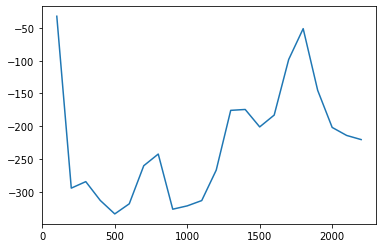

In [8]:
x,R_s = R.smooth()
plt.plot(x,R_s)

In [21]:
del agent